# 3. DL Intro

## 3-1. DL History
- 퍼셉트론(Perceptron)
  - 입력층, 출력층, 가중치로 구성
  - 선형(linear) -> AND / OR
  - 비선형(non-linear) -> XOR -> 다중 퍼셉트론(MLP)

## 3-2. Struct
![ANN](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/01/image-6.png)  

- 층(layer)
  - 입력층(input layer)
  - 은닉층(hidden layer)
  - 출력층(output layer)
- 가중치(weight): 노드-노드
- 바이어스(bias): 상수 가중치, 출력값 조절
- 전달 함수(transfer function)
- 활성 함수(activation function)
- 손실 함수(loss function)

### VS
- 목적함수 -> 최적화 방식
- 비용함수 -> 모든 데이터에 대해(Full-Batch)
- 손실함수 -> Batch, sum(손실함수)==비용함수

### 활성 함수(activation function)
- 전달 함수에서 전달 받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화 시킴
- 시그모이드(sigmoid):
  - $f(x)={1 \over {1+e^{-x}}}$
  - 0~1 사이의 비선형 값
  - 기울기 소멸 문제(gradient vanishing)
- 하이퍼볼릭 탄젠트(tanh)
  - -1~1 사이의 비선형 값
  - 평균이 0이 아닌 양수로 편향 문제를 해결했지만, 소멸문제는 여전히 있음
- 렐루(ReLU)
  - 경사하강법에 영향을 주지 않아 학습 속도가 빠름
  - 기울기 소멸 문제 해결
  - 리키 렐루(Leaky ReLU)
- 소프트맥스(softmax)
  - 0~1 사이의 정규화된 출력
  - 총합은 항상 1임

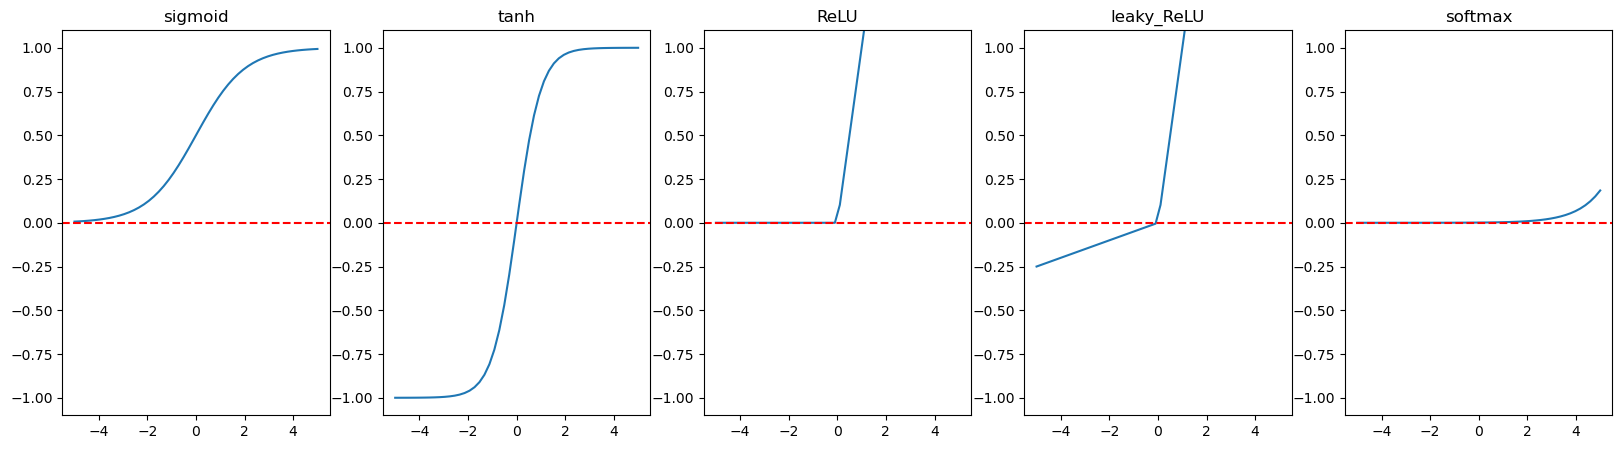

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1/(1+np.exp(-x))
def tanh(x): return np.tanh(x)
def ReLU(x): return [v if v>=0 else 0 for v in x]
def leaky_ReLU(x): return [max(0.05*v, v) for v in x]
def softmax(x): return np.exp(x) / np.sum(np.exp(x))

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
x = np.linspace(-5, 5)

for idx, func in enumerate([sigmoid, tanh, ReLU, leaky_ReLU, softmax]):
    ax[idx].plot(x, func(x))
    ax[idx].set_title(func.__name__)
    ax[idx].axhline(0, color="r", linestyle="--")
    ax[idx].set_ylim([-1.1, 1.1])

### 손실 함수(Loss Func)
- 경사 하강법은 학습률과 손실 함수의 순간 기울기(미분 이용)를 이용해 가중치 업데이트 -> 미분의 기울기를 이용해 오차를 비교, 최소화하는 방향으로 이동
- 평균 제곱 오차(MSE)
  - 실제값과 예측값의 차이를 제곱하여 평균
  - 회귀에서 주로 사용
- 크로스 엔트로피 오차(CEE)
  - 분류에서 주로 사용 (원-핫 인코딩 적용시)
  - Binary Cross Entropy (BCE): 이진 분류 문제
  - Categorical Cross Entropy (CCE): 일반적인 크로스 엔트로피, [0, 0, 1], [0, 1, 0], ...
  - Sparse Categorical Cross Entropy (SCE): 라벨이 정수일 때, 1, 2, 3, ...

### 학습
- 순전파(feedforward)
- 역전파(backpropagation)
  - 은닉층의 뉴런은 원래 출력에 기여한 정도에 따라 가중치 변경

### 문제점과 해결 방안
- 과적합(overfitting) -> drop-out, early stop, ...
- 기울기 소멸(gradient vanishing)
- 확률적 경사 하강법, 미니 배치 경사 하강법

### 경사 하강법
- 배치 경사 하강법(BGD): 전체 데이터셋에 대한 오류를 구하고 가중치를 업데이트 (`전체)
- 확률적 경사 하강법(SGD): 임의로 선택한 데이터에 대해 (`랜덤)
- 미니 배치 경사 하강법(mini-batch): 전체를 여러개로 나누고(미니-배치), 각 배치마다 기울기를 구하고 평균을 이용

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
        self.y_data = [[1], [2], [3]]
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
    
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # batch_size = 미니 배치 크기

### 옵티마이저(Optimizer)
- 학습 속도와 운동량을 조정

![optimizer](https://velog.velcdn.com/images/chang0517/post/f955570a-69fb-4c2a-9f19-f9c7264599ca/image.png)

In [ ]:
torch.optim.Adagrad(model.parameters(), lr=0.01)
torch.optim.Adadelta(model.parameters(), lr=1.0)
torch.optim.RMSprop(model.parameters(), lr=0.01)
torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True) # NAG
torch.optim.Adam(model.parameters(), lr=0.01)

## 3.3 주요 알고리즘
- 심층 신경망(DNN): 입력층 - 은닉층 - 출력층
- 합성곱 신경망(CNN): 합성곱충(conv)과 풀링층(pooling), 이미지 처리
- 순환 신경망(RNN): 자기 자신을 참조, 시계열 데이터, 자연어 처리
  - 기울기 소멸 문제 -> 메모리 개념 추가 -> LSTM, GRU